<a href="https://colab.research.google.com/github/Manojgharge07/Machine_Learning_Data_Science/blob/main/ML_24_Unsupervised_Learning_Algorithms_(PCA)_(Part2)_Assignment_Boston_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
# Python program to perform classification on Iris dataset
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Generate data sets
from sklearn.datasets import make_blobs

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [168]:
from sklearn.datasets import load_boston

load_boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [169]:
print(load_boston.feature_names)
print(len(load_boston.feature_names))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
13


In [170]:
# Loading dataset 
import pandas as pd
boston_ld = pd.DataFrame(load_boston.data)
boston_ld.columns = load_boston.feature_names
boston_ld_target = np.asarray(load_boston.target)
boston_ld['House Price'] = pd.Series(boston_ld_target)

In [171]:
boston_ld.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [172]:
boston_ld.shape

(506, 14)

In [173]:
boston_ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    float64
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    float64
 9   TAX          506 non-null    float64
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  House Price  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [174]:
boston_ld.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [175]:
#saving our new data in csv
#and we use this data for RFM analysis and here after we use sql
boston_ld.to_csv('Binning.csv')

In [176]:
#checking our new dataset
binning=pd.read_csv('/content/Binning.csv')

In [177]:
df1= binning

In [178]:
df1.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# **Binning in 2 segments**

In [179]:
def binningfunction(col,cut_points,labels=None):
  minval =col.min()
  maxval =col.max()
  break_points=[minval]+ cut_points +[maxval] 
  print(break_points)
  if not labels:
    labels =range(len(cut_points)+1)
  colbin=pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colbin


In [180]:
cut_points=[27.5];
labels=["1","2"]
df1["House Rating"]=binningfunction(df1["House Price"],cut_points,labels)
df1

[5.0, 27.5, 50.0]


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price,House Rating
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,2
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,1
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,1
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1


In [181]:
df1.drop(['House Price'],axis=1,inplace=True)
df1.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Rating
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,2
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,2


In [182]:
df1.shape

(506, 15)

# **Method 1 — Training the Model using all the Features**
Before we perform PCA on the dataset, let’s use logistic regression to train a model using all the 30 features in the dataset and see how well it performs:

In [183]:
# input
X = df1.iloc[:, :-1]

#output
y =df1.iloc[:, -1]

In [184]:
X_train, X_test, y_train, y_test = train_test_split(
	df1.iloc[:, :-1],
   df1.iloc[:, -1],
	test_size = 0.3)

In [185]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [186]:
print("Train data shape of X = % s and Y = % s : "%(
	X_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	X_test.shape, y_test.shape))

Train data shape of X = (354, 14) and Y = (354,) : 
Test data shape of X = (152, 14) and Y = (152,) : 


In [187]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)

y_pred = lreg.predict(X_test)

# print the accuracy
print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression:  0.9473684210526315


# **Training the Model using Reduced Features (PCA)**
Finally, let’s apply PCA to the dataset and see if a better model can be trained.

# **# Performing Standard Scaling**
Remember that PCA is sensitive to scaling? So the first step is to perform a standard scaling on the 30 features:

In [188]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# **Applying Principal Component Analysis (PCA)**
You can now apply PCA to the features using the PCA class in the sklearn.decomposition module

In [207]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [208]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[45.76524265 11.5931614   9.43467902  6.35482822  6.05328738  4.88407278
  4.12952061  2.98862003  2.44755835  1.82582414  1.57269551  1.2912076
  1.20573191  0.45357039]



You can now interpret the cumulative variances as follows:

The first component alone captures about 44% variability in the data

The first two components capture about 63% variability in the data and so on.

The first 8 components together capture about 92.6% variability in the data.

A visual way to view the cumulative variances is to plot a scree plot.

A scree plot is a line plot of the principal components.

Text(0, 0.5, 'Explained variance (%)')

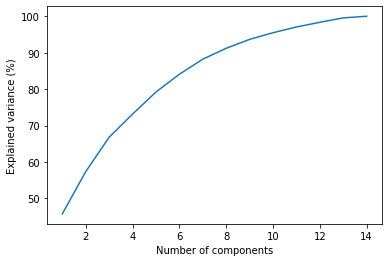

In [191]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[45.76524265 57.35840405 66.79308307 73.14791129 79.20119866 84.08527145
 88.21479206 91.20341209]
Number of components: 8


Text(0, 0.5, 'Explained variance (%)')

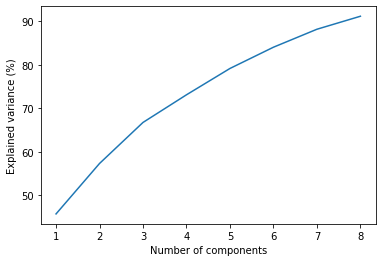

In [192]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [193]:
pca_components = abs(pca.components_)
print(pca_components)

[[0.22302535 0.24955521 0.24052939 0.33668339 0.00415599 0.33298899
  0.17786616 0.29811007 0.3091061  0.32400346 0.34042654 0.20159255
  0.20045999 0.29686372]
 [0.44623112 0.28003903 0.4021976  0.12503576 0.21071418 0.16370703
  0.14976555 0.31782684 0.29211694 0.33678931 0.27928456 0.12080965
  0.21298435 0.11704055]
 [0.18473742 0.00315411 0.07502858 0.03927269 0.50338846 0.200056
  0.57655222 0.12358056 0.21421384 0.09982531 0.06010082 0.41171909
  0.05968086 0.29162365]
 [0.23782431 0.16548366 0.15622868 0.04115954 0.50721114 0.15342127
  0.07996707 0.12478572 0.07233449 0.12857019 0.09531171 0.51981283
  0.51308057 0.15126755]
 [0.06971249 0.14752032 0.3348796  0.00250966 0.6134519  0.00896986
  0.46544055 0.1054074  0.22229244 0.04297086 0.01677887 0.23447807
  0.20211726 0.33121693]
 [0.23942409 0.03473422 0.30462456 0.11000074 0.24969337 0.21171704
  0.19587511 0.05400169 0.03385329 0.02686713 0.12570101 0.42383837
  0.6915832  0.1119121 ]
 [0.2918667  0.81625193 0.03471788 0

The importance of each feature is reflected by the magnitude of the corresponding values in the output — the higher magnitude, the higher the importance. The following figure shows how you can interpret the results above:

In [195]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df1.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['TAX', 'INDUS', 'NOX', 'RAD']
Component 1: ['Unnamed: 0', 'ZN', 'RAD', 'AGE']
Component 2: ['RM', 'CHAS', 'PTRATIO', 'LSTAT']
Component 3: ['PTRATIO', 'B', 'CHAS', 'Unnamed: 0']
Component 4: ['CHAS', 'RM', 'ZN', 'LSTAT']
Component 5: ['B', 'PTRATIO', 'ZN', 'CHAS']
Component 6: ['CRIM', 'B', 'Unnamed: 0', 'INDUS']
Component 7: ['ZN', 'AGE', 'PTRATIO', 'Unnamed: 0']


# **Transforming all the 13 Columns to the 6 Principal Components**
You can now transform the standardized data of the 13 columns in the dataset to the 6 principal components:

In [196]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(506, 8)
[[-2.44147499  1.05272429  0.43019283 ... -0.18391366  0.51367284
  -0.08439815]
 [-1.82858558  1.39432757 -0.52784453 ...  0.50638184  0.61084027
   0.25625659]
 [-2.4130474   0.93374599  0.23428824 ...  0.86314584  0.64192442
   0.14185166]
 ...
 [ 0.05382673  0.25363156  0.64224211 ...  0.16400549 -0.36232281
  -0.16660393]
 [ 0.09487349  0.24358426  0.43189983 ...  0.13158657 -0.42275786
  -0.2364645 ]
 [ 0.23169787  0.32440149 -0.30301801 ... -0.11343339 -0.62969674
  -0.66251445]]


# **Creating a Machine Learning Pipeline**
Let’s now create a machine learning pipeline so that we can formalize the entire process:

In [197]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

We then split the dataset into training and testing sets and train the model using the training set:

In [198]:
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=8)),
                ('regressor', LogisticRegression())])

In [199]:
log_regress_model.score(X_test,y_test)

0.9605263157894737